# MiniBatchKMeans Clustering
MiniBatchKMeans is a variant of the K-Means clustering algorithm that uses mini-batches to reduce the computational cost. It processes small random subsets of the dataset to update the cluster centers, making it faster and more scalable for large datasets.

## Use Cases
- Large-scale Data Analysis: Suitable for clustering large datasets where traditional K-Means would be too slow.
- Real-time Data Processing: Can be used in streaming data applications due to its incremental nature.
- Customer Segmentation: Efficiently segmenting customers in large-scale marketing data.
- Image Segmentation: Fast processing of large image datasets for segmentation tasks.

## Advantages
- Speed: Faster than traditional K-Means due to processing smaller batches.
- Scalability: Can handle larger datasets more efficiently.
- Memory Efficiency: Requires less memory as it operates on small batches.
- Approximate Results: Provides a good approximation of K-Means in less time.
- Work with huge data better than DBSCAN

## Disadvantages
- Initialization Sensitivity: Like K-Means, results can vary based on initial centroids.
- Fixed Number of Clusters: Requires specifying the number of clusters (K) beforehand.
- Potential for Poor Convergence: May not converge as accurately as K-Means on some datasets.


# import library

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons, make_circles
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Set environment variable to avoid memory leak warning
os.environ["OMP_NUM_THREADS"] = "2"

# plot the Elbow

In [2]:
# Helper function to plot the Elbow Method graph
def plot_elbow_method(data, max_k):
    distortions = []
    K = range(1, max_k + 1)
    for k in K:
        kmeans = MiniBatchKMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        distortions.append(kmeans.inertia_)
    plt.figure(figsize=(8, 5))
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method showing the optimal k')
    plt.show()

# visualize clusters

In [3]:
# Helper function to visualize clusters
def visualize_clusters(data, n_clusters):
    kmeans = MiniBatchKMeans(n_clusters=n_clusters, random_state=42)
    y_kmeans = kmeans.fit_predict(data)
    plt.figure(figsize=(8, 5))
    plt.scatter(data[:, 0], data[:, 1], c=y_kmeans, s=50, cmap='viridis')
    centers = kmeans.cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75)
    plt.title(f'Visualization of {n_clusters} Clusters')
    plt.show()
    return y_kmeans

# evaluate clusters

In [4]:
# Helper function to evaluate clusters
def evaluate_clusters(data, labels):
    silhouette_avg = silhouette_score(data, labels)
    db_score = davies_bouldin_score(data, labels)
    print(f'Silhouette Score: {silhouette_avg}')
    print(f'Davies-Bouldin Score: {db_score}')

# Using make_blobs

c:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1952: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 5120 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
c:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1952: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 5120 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
c:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1952: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 5120 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
c:\Users\PC\anac

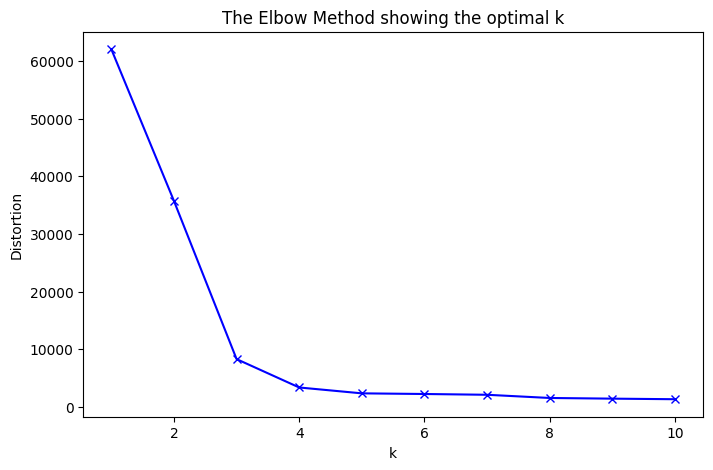

In [5]:
data_blobs, _ = make_blobs(n_samples=1000, centers=6, cluster_std=1, random_state=42)
plot_elbow_method(data_blobs, 10)

c:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1952: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 5120 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


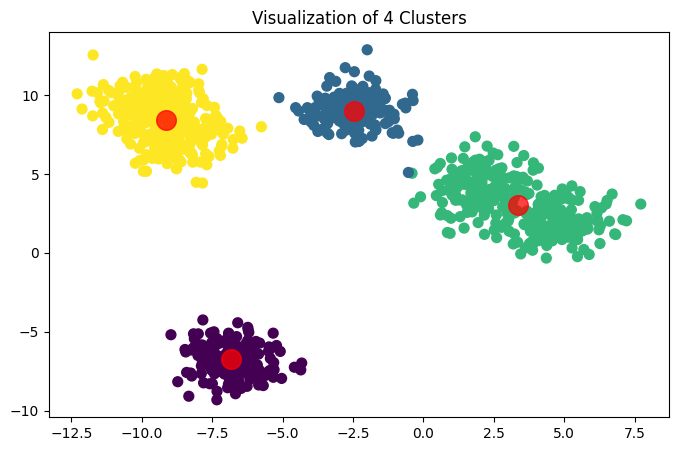

In [6]:
labels_blobs = visualize_clusters(data_blobs, 4)

In [7]:
evaluate_clusters(data_blobs, labels_blobs)

Silhouette Score: 0.708794491322397
Davies-Bouldin Score: 0.3667644915491537


# Using make_moons

c:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1952: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 5120 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
c:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1952: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 5120 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
c:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1952: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 5120 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
c:\Users\PC\anac

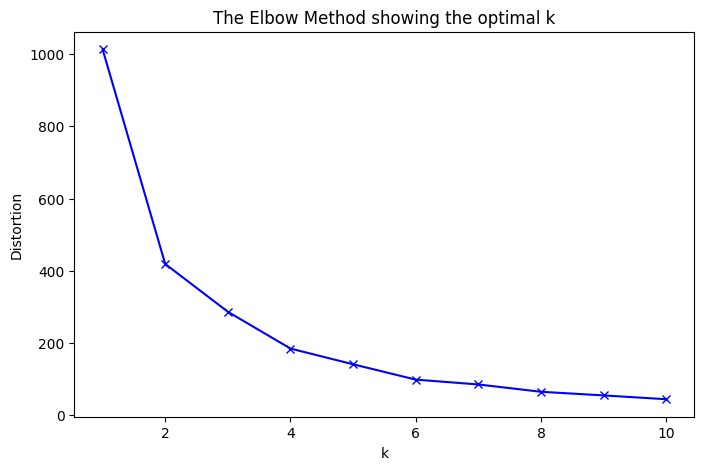

In [8]:
data_moons, _ = make_moons(n_samples=1000, noise=0.1, random_state=42)
plot_elbow_method(data_moons, 10)

c:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1952: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 5120 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


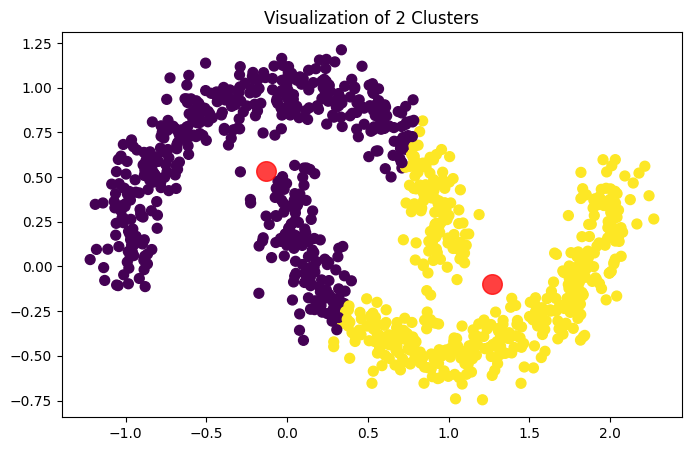

In [9]:
labels_moons = visualize_clusters(data_moons, 2)

In [10]:
evaluate_clusters(data_moons, labels_moons)

Silhouette Score: 0.4813668023488826
Davies-Bouldin Score: 0.7887968773298217


# Using make_circles

c:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1952: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 5120 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
c:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1952: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 5120 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
c:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1952: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 5120 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
c:\Users\PC\anac

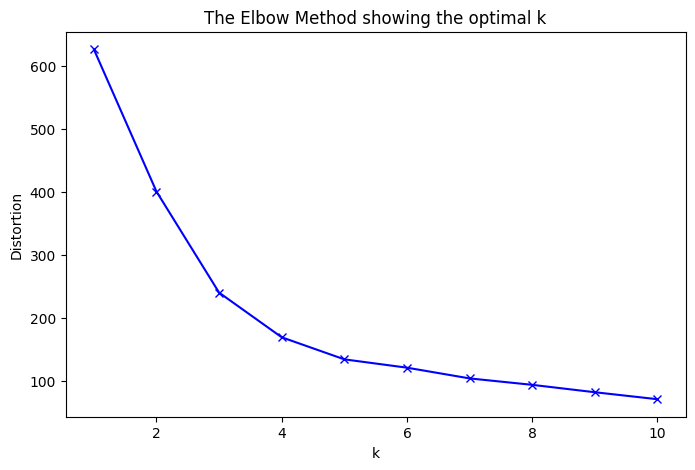

In [11]:
data_circles, _ = make_circles(n_samples=1000, factor=0.5, noise=0.05, random_state=42)
plot_elbow_method(data_circles, 10)

c:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1952: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 5120 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


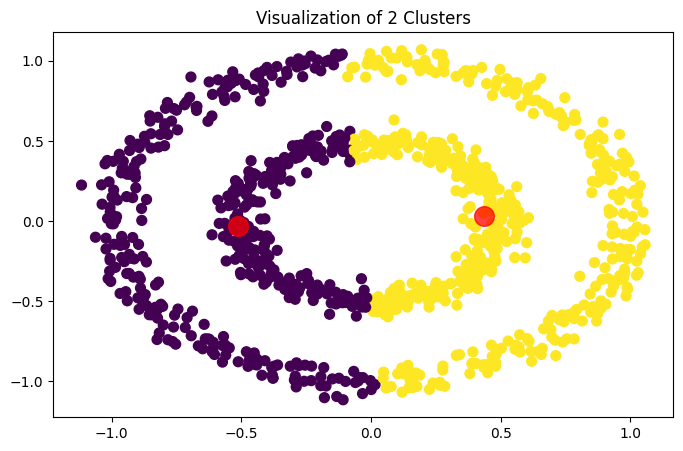

In [12]:
labels_circles = visualize_clusters(data_circles, 2)

In [13]:
evaluate_clusters(data_circles, labels_circles)

Silhouette Score: 0.34999670075851896
Davies-Bouldin Score: 1.193503790674313
